I learned and combined various Kaggle submissions, hopefully using all I learned to help you learn!  You can access any of these below:
* https://www.kaggle.com/code/ldfreeman3/a-data-science-framework-to-achieve-99-accuracy
* https://www.kaggle.com/code/nadintamer/titanic-survival-predictions-beginner
* https://www.kaggle.com/code/ash316/eda-to-prediction-dietanic
* https://www.kaggle.com/code/mrisdal/exploring-survival-on-the-titanic
* https://www.kaggle.com/code/startupsci/titanic-data-science-solutions

As many of the above sites do, I'm trying to provide you an educational resource as to why things are done a certain way instead of just doing them!
Data Science (analytics/informatics/machine learning) sounds like fun to me, but, unfortunately, a majority of the time is spent in 'wrangling' the data and not just running an algorithm!

A Data Science Framework
1. **Define the Problem**: If data science, big data, machine learning, predictive analytics, business intelligence, or any other buzzword is the solution, then what is the problem? As the saying goes, don't put the cart before the horse. Problems before requirements, requirements before solutions, solutions before design, and design before technology. Too often we are quick to jump on the new shiny technology, tool, or algorithm before determining the actual problem we are trying to solve.

2. **Gather the Data**: John Naisbitt wrote in his 1984 (yes, 1984) book Megatrends, we are “drowning in data, yet staving for knowledge." So, chances are, the dataset(s) already exist somewhere, in some format. It may be external or internal, structured or unstructured, static or streamed, objective or subjective, etc. As the saying goes, you don't have to reinvent the wheel, you just have to know where to find it. In the next step, we will worry about transforming "dirty data" to "clean data."

3. **Prepare Data for Consumption**: This step is often referred to as data wrangling, a required process to turn “wild” data into “manageable” data. Data wrangling includes implementing data architectures for storage and processing, developing data governance standards for quality and control, data extraction (i.e. ETL and web scraping), and data cleaning to identify aberrant, missing, or outlier data points.

4. **Perform Exploratory Analysis**: Anybody who has ever worked with data knows, garbage-in, garbage-out (GIGO). Therefore, it is important to deploy descriptive and graphical statistics to look for potential problems, patterns, classifications, correlations and comparisons in the dataset. In addition, data categorization (i.e. qualitative vs quantitative) is also important to understand and select the correct hypothesis test or data model.

5. **Model Data**: Like descriptive and inferential statistics, data modeling can either summarize the data or predict future outcomes. Your dataset and expected results, will determine the algorithms available for use. It's important to remember, algorithms are tools and not magical wands or silver bullets. You must still be the master craft (wo)man that knows how-to select the right tool for the job. An analogy would be asking someone to hand you a Philip screwdriver, and they hand you a flathead screwdriver or worst a hammer. At best, it shows a complete lack of understanding. At worst, it makes completing the project impossible. The same is true in data modelling. The wrong model can lead to poor performance at best and the wrong conclusion (that’s used as actionable intelligence) at worst.

6. **Validate and Implement Data Model**: After you've trained your model based on a subset of your data, it's time to test your model. This helps ensure you haven't overfit your model or made it so specific to the selected subset, that it does not accurately fit another subset from the same dataset. In this step we determine if our [model overfit, generalize, or underfit our dataset](https://docs.aws.amazon.com/machine-learning/latest/dg/model-fit-underfitting-vs-overfitting.html)

7. **Optimize and Strategize**: This is the "bionic man" step, where you iterate back through the process to make it better...stronger...faster than it was before. As a data scientist, your strategy should be to outsource developer operations and application plumbing, so you have more time to focus on recommendations and design. Once you're able to package your ideas, this becomes your “currency exchange" rate.

**Step 1: Define the Problem**
Develop an algorithm to predict the survival outcome of passengers on the Titanic.

**Step 2: Gather the Data**
The dataset is given to us!

**Step 3: Prepare Data for Consumption**
The data is already organized, therefore, normal processes in data wrangling, such as data architecture, governance, and extraction are not necessary (nor do I know how). Thus, only data cleaning is in scope.

In [1]:
#3.1: Load Necessary Modelling Libraries:

import numpy as np # numpy is numerical python 
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns #visualization library

# There were issues last time with loading files, so hopefully this command below will give a direct link you can use for the files.
# Train.csv is all we will use.

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
#loading the "train" data using pd for pandas.
titanicdata = pd.read_csv('/kaggle/input/titanic/train.csv')

#looking at 10 random samples of the data
titanicdata.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
560,561,0,3,"Morrow, Mr. Thomas Rowan",male,NaN,0,0,372622,7.7500,NaN,Q
484,485,1,1,"Bishop, Mr. Dickinson H",male,25.0,1,0,11967,91.0792,B49,C
124,125,0,1,"White, Mr. Percival Wayland",male,54.0,0,1,35281,77.2875,D26,S
579,580,1,3,"Jussila, Mr. Eiriik",male,32.0,0,0,STON/O 2. 3101286,7.9250,NaN,S
623,624,0,3,"Hansen, Mr. Henry Damsgaard",male,21.0,0,0,350029,7.8542,NaN,S
713,714,0,3,"Larsson, Mr. August Viktor",male,29.0,0,0,7545,9.4833,NaN,S
496,497,1,1,"Eustis, Miss. Elizabeth Mussey",female,54.0,1,0,36947,78.2667,D20,C
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
95,96,0,3,"Shorney, Mr. Charles Joseph",male,NaN,0,0,374910,8.0500,NaN,S


**3.2 Meet and Greet Data**
Get to know your data by first name and learn a little bit about it. What does it look like (datatype and values), what makes it tick (independent/feature variables(s)), what's its goals in life (dependent/target variable(s)).

Next we use the info() and sample() function, to get a quick and dirty overview of variable datatypes (i.e. qualitative vs quantitative).  We explored all of these in Excel, but I added some bits, so check it out again!

1. The *Survived* variable is our outcome or dependent variable. It is a binary nominal datatype of 1 for survived and 0 for did not survive. All other variables are potential predictor or independent variables. It's important to note, **more predictor variables do not make a better model, but the right variables will.**
2. The *PassengerID* and *Ticket* variables are assumed to be random unique identifiers, that have no impact on the outcome variable. Thus, they will be excluded from analysis.
3. The *Pclass* variable is an ordinal datatype for the ticket class, a proxy for socio-economic status (SES), representing 1 = upper class, 2 = middle class, and 3 = lower class.
4. The *Name* variable is a nominal datatype. It could be used in feature engineering to derive the gender from title, family size from surname, and SES from titles like doctor or master. Since these variables already exist, we'll make use of it to see if title, like 'Master', makes a difference.
5. The *Sex* and *Embarked* variables are a categorical, nominal datatype. They will be converted to dummy variables for mathematical calculations.
6. The *Age* and *Fare* variable are continuous quantitative datatypes.
7. The *SibSp* represents number of related siblings/spouse aboard and *Parch* represents number of related parents/children aboard. Both are discrete quantitative datatypes. This can be used for feature engineering to create a family size and 'is alone' variable.
8. The *Cabin* variable is missing many values, however, later we will make this a binary variable, Cabin=1, no Cabin=0.

In [3]:
#We discuss above, but we can also see the data type: integer "int64", categorical "object", or numerical "float64"
titanicdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
#easier way to see missing values--I list two commands, they do the same thing, the second is better--but just be aware of varying code!
#NOTE: if two lines of code are written, as below, only the bottom line will display unless the print(---enter the code here---) is used.
pd.isnull(titanicdata).sum()
titanicdata.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

There are 177 missing values for Age, 687 for Cabin, and 2 for Embarked.  Our algorithms can't work with values that are not numbers, listed as "NaN". So we'll need to decide what to do with these.

In [7]:
#The following command gives even more information, including quartiles.  It is nice to get a distribution for the data!

titanicdata.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


Some of the highlights:  There are 891 unique names, as expected, only 2 sexes (as expected), the average age was 30, lots of unique tickets and Cabins, but only 3 embarked, the most common being "S" with 644 departing from there.

# **3.21 The 4 C's of Data Cleaning: Correcting, Completing, Creating, and Converting**
In this stage, we will clean our data by 1) correcting aberrant values and outliers, 2) completing missing information, 3) creating new features for analysis, and 4) converting fields to the correct format for calculations and presentation.

1. **Correcting**: Reviewing the data, there does not appear to be any aberrant or non-acceptable data inputs. In addition, we see we may have potential outliers in age and fare. However, since they are reasonable values, we will wait until after we complete our exploratory analysis to determine if we should include or exclude from the dataset. It should be noted, that if they were unreasonable values, for example age = 800 instead of 80, then it's probably a safe decision to fix now. However, we want to use caution when we modify data from its original value, because it may be necessary to create an accurate model.

2. **Completing**: There are null values or missing data in the age, cabin, and embarked field. Missing values can be bad, because some algorithms don't know how-to handle null values and will fail. While others, like decision trees, can handle null values. Thus, it's important to fix before we start modeling, in case we want to compare and contrast several models. There are two common methods, either delete the record or populate the missing value using a reasonable input. It is not recommended to delete the record, especially a large percentage of records, unless it truly represents an incomplete record. Instead, it's best to impute missing values. *A basic methodology for qualitative data is impute using mode*. *A basic methodology for quantitative data is impute using mean, median, or mean + randomized standard deviation*. An intermediate methodology is to use the basic methodology based on specific criteria; like the average age by class or embark port by fare and SES. There are more complex methodologies, however before deploying, it should be compared to the base model to determine if complexity truly adds value. Imputing age with median is easy (KISS), however, we could use the 'name' column to predict the age and get a better model (in exchange for more work!)  Embark will be imputed with mode. Subsequent model iterations may modify this decision to determine if it improves the model’s accuracy.

3. **Creating**: Feature engineering is when we use existing features to create new features to determine if they provide new signals to predict our outcome. For this dataset, we will create a **title** feature to determine if it played a role in survival.

4. **Converting**: Last, but certainly not least, we'll deal with formatting. There are no date or currency formats, but datatype formats. Our categorical data imported as objects, which makes it difficult for mathematical calculations. For this dataset, we will convert object datatypes to categorical dummy variables.

 

**I vary from the original document at this point--I believe it is critical to incorporate step 4 "Perform Exploratory Analysis" alongside step 3 "Prepare the Data".  The reason for this is some data does not deserve our time.  For example, ticket number, there is no need to clean up this data because it does not tell us anything useful, it is just a random number assigned to people.  However, to know this we would have to do a little exploratory analysis. 
Another example: Cabin.  Most kaggle Titanic sites I visited said "Cabin doesn't matter" and there is too much missign data, so just drop it.  HOWEVER, as we will soon see, those with Cabin data were more likely to survive than those without.  So, instead of eliminating the data, we will turn it binary.  "1" for "has a cabin number" and "0" for does not.  This will take care of all the NaN, and provide us with helpful information!

**3.22 Clean Data**

In [8]:
#simpliest first: we have two missing embarked values, we will fill them with the mode, S:
titanicdata['Embarked'].fillna(titanicdata['Embarked'].mode()[0], inplace = True)

In [9]:
#PassengerID and Ticket number are clearly just random identifiers and have no impact on outcome--so let's delete them!
titanicdata.drop(['PassengerId','Ticket'],axis=1,inplace=True)

In [10]:
#Next we'll look at "Name" though names don't tell us much, TITLES do!  Here is a command I found in multiple worksheets to extract titles!
#This command adds a new column "Title" to our data:
titanicdata['Title']=titanicdata.Name.str.extract('([A-Za-z]+)\.',expand=False)

#nice way to see this data
titanicdata['Title'].value_counts()

Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64

FYI:  Most of these titles are "rare" meaning there are only a few of them.  Here is where the 'art' of data science comes into play.  We can combine them in different ways.  We could take everything that is not the big four: Mr, Mrs, Master, or Miss and combine it to "Rare".  Or we could use a finer toothed comb and notice that some of the titles are just abbreviations of titles we already know!

* Mlle: Mademoiselle, an unmarried (presumably French) woman ("Miss.")
* Mme: Madame, a married (presumably French) woman ("Mrs.")
* Ms: we'll assume ("Mrs.")
* Countess/Lady: ("Mrs.") --though one could also make the argument that Countess/Lady should be filed under "Royalty" --important for a different reason

In [11]:
#It is also nice to see this data seperated by sex:
pd.crosstab(titanicdata['Title'],titanicdata['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [12]:
#It is nice to see the data, before replacing/regrouping these, so let's just check the ultimate goal, survivability!
pd.crosstab(titanicdata['Title'],titanicdata['Survived'])

Survived,0,1
Title,,
Capt,1,0
Col,1,1
Countess,0,1
Don,1,0
Dr,4,3
Jonkheer,1,0
Lady,0,1
Major,1,1
Master,17,23


In [13]:
#We CANNOT make assumptions/conclusions off of one or two data points!  We CANNOT assume all "Ms" survive, though with our data subset, it is true.  Normally we have data where we find patterns so we can apply those patterns to other, newer data, so gross assumptions off of a single data point are generally not a good idea.  However, we can regroup:  Mlle, Mme, Ms, Lady, Countess as "Mrs." and leave the others as rare
titanicdata['Title']=titanicdata['Title'].replace(['Mlle',"Mme","Lady","Countess","Ms"],'Mrs')
titanicdata['Title']=titanicdata['Title'].replace(['Dr',"Rev","Major","Col","Don","Sir","Capt","Jonkheer"],'Rare')
#and then look at our new data
titanicdata['Title'].value_counts()

Title
Mr        517
Miss      182
Mrs       131
Master     40
Rare       21
Name: count, dtype: int64

In [14]:
#We now no longer need "Name"
titanicdata.drop(['Name'],axis=1,inplace=True)
#and then look at the data again
titanicdata.sample(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
530,1,2,female,2.0,1,1,26.0000,NaN,S,Miss
771,0,3,male,48.0,0,0,7.8542,NaN,S,Mr
147,0,3,female,9.0,2,2,34.3750,NaN,S,Miss
643,1,3,male,NaN,0,0,56.4958,NaN,S,Mr
633,0,1,male,NaN,0,0,0.0000,NaN,S,Mr
595,0,3,male,36.0,1,1,24.1500,NaN,S,Mr
797,1,3,female,31.0,0,0,8.6833,NaN,S,Mrs
366,1,1,female,60.0,1,0,75.2500,D37,C,Mrs
97,1,1,male,23.0,0,1,63.3583,D10 D12,C,Mr
723,0,2,male,50.0,0,0,13.0000,NaN,S,Mr


In [22]:
#Before we tackle the missing Age values, we should ask, is it worth it?  Does Age impact survivability?  However, we can't let Age be in its current continous state--we need to BIN it.  Again, the art of data science: What size bins? / how many bins?  Should we self-select, or use technology?  I'm going to use technology and create a new column with ages in 5 bins.  HOWEVER, I can't do this with my NaN values, so I'll first create a new data set where I eliminate all 177 ageless entries...
titanictempdata=titanicdata[["Age","Survived"]]
titanictempdata=titanictempdata.dropna()

In [23]:
#now that the NaN are (temporarily) removed, we can visualize surviability, but first we make BINS
#Here we use "cut" for equal age bins (16 to 32 and 32 to 48 etc).  Later we'll use "qcut" for equal numbers of people in each bin.
titanictempdata['AgeBin'] = pd.cut(titanictempdata['Age'].astype(int), 5)
#and then look at it
titanictempdata['AgeBin'].info

<bound method Series.info of 0      (16.0, 32.0]
1      (32.0, 48.0]
2      (16.0, 32.0]
3      (32.0, 48.0]
4      (32.0, 48.0]
           ...     
885    (32.0, 48.0]
886    (16.0, 32.0]
887    (16.0, 32.0]
889    (16.0, 32.0]
890    (16.0, 32.0]
Name: AgeBin, Length: 714, dtype: category
Categories (5, interval[float64, right]): [(-0.08, 16.0] < (16.0, 32.0] < (32.0, 48.0] < (48.0, 64.0] < (64.0, 80.0]]>

<Axes: xlabel='AgeBin', ylabel='Survived'>

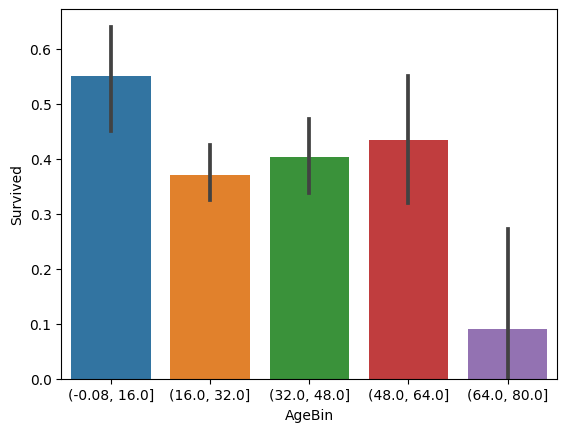

In [25]:
sns.barplot(x="AgeBin", y="Survived", data=titanictempdata)

<Axes: xlabel='AgeBin', ylabel='count'>

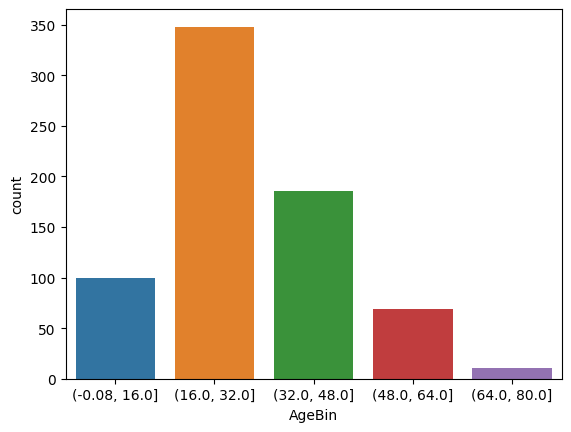

In [26]:
#Younger people were more likely to survive, older, not so much.  Let's look at how many people are in each bin!
sns.countplot(x="AgeBin", data=titanictempdata)

In [31]:
#Alternatively, we can use "qcut" to designate an equal number of people in each bin:
titanictemp2data=titanicdata[["Age","Survived"]]
titanictemp2data=titanictemp2data.dropna()
titanictemp2data['AgeBin'] = pd.qcut(titanictemp2data['Age'].astype(int), 5)
#and then look at it
titanictemp2data['AgeBin'].info

<bound method Series.info of 0        (19.0, 25.0]
1        (31.8, 41.0]
2        (25.0, 31.8]
3        (31.8, 41.0]
4        (31.8, 41.0]
            ...      
885      (31.8, 41.0]
886      (25.0, 31.8]
887    (-0.001, 19.0]
889      (25.0, 31.8]
890      (31.8, 41.0]
Name: AgeBin, Length: 714, dtype: category
Categories (5, interval[float64, right]): [(-0.001, 19.0] < (19.0, 25.0] < (25.0, 31.8] < (31.8, 41.0] < (41.0, 80.0]]>

<Axes: xlabel='AgeBin', ylabel='Survived'>

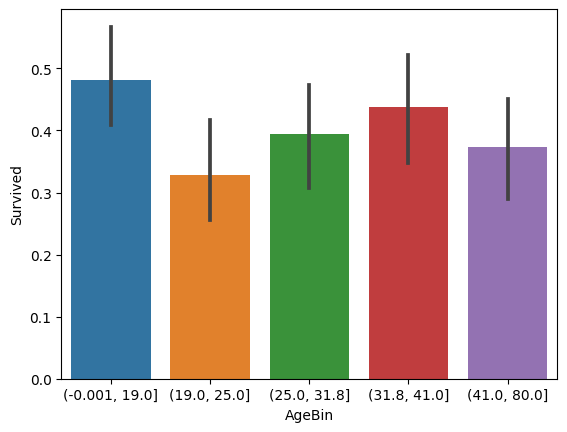

In [32]:
#Python has autobinned this to 0 to 19, 19 to 25, 25 to 31.8, 31.8 to 41 and 41 to 80.
sns.barplot(x="AgeBin", y="Survived", data=titanictemp2data)
#plot below still shows younger more likely to live, but lost some of the info but equalizing numbers in each bin.
#Long story short: age does give us information on survivability, so let's do our best to fill in age values (replace all NaN)

# Time to tackle the missing age values.  Our recent work with "Title" will help alot!

In [33]:
#For general description
titanicdata[titanicdata["Title"]=="Master"].Age.describe()

count    36.000000
mean      4.574167
std       3.619872
min       0.420000
25%       1.000000
50%       3.500000
75%       8.000000
max      12.000000
Name: Age, dtype: float64

In [34]:
#So--"Master" means between 0 and 12!  Since there are only 40 data points (36 + 4 NaN), let's take a look at this list, sorted:
titanicdata[titanicdata["Title"]=="Master"].sort_values(by=['Age'])

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
803,1,3,male,0.42,0,1,8.5167,NaN,C,Master
755,1,2,male,0.67,1,1,14.5000,NaN,S,Master
831,1,2,male,0.83,1,1,18.7500,NaN,S,Master
78,1,2,male,0.83,0,2,29.0000,NaN,S,Master
305,1,1,male,0.92,1,2,151.5500,C22 C26,S,Master
827,1,2,male,1.00,0,2,37.0042,NaN,C,Master
164,0,3,male,1.00,4,1,39.6875,NaN,S,Master
788,1,3,male,1.00,1,2,20.5750,NaN,S,Master
183,1,2,male,1.00,2,1,39.0000,F4,S,Master
386,0,3,male,1.00,5,2,46.9000,NaN,S,Master


In [35]:
# Let's fill in those four NaN. We could use the median, (code for that below), or mean, 4.5 previously calculated above.
titanicdata[titanicdata["Title"]=="Master"].sort_values(by=['Age'])['Age'].median()

3.5

In [36]:
#I'm using mean--this command took me three hours to figure out, so enjoy it.
titanicdata.loc[(titanicdata.Age.isnull())&(titanicdata.Title=="Master"),'Age']=4.5

**Now we need to rinse and repeat for Mr, Miss, Mrs, Rare**

In [38]:
print("Mr mean age:",titanicdata[titanicdata["Title"]=="Mr"].Age.mean())
print("Miss mean age:",titanicdata[titanicdata["Title"]=="Miss"].Age.mean())
print("Mrs mean age:",titanicdata[titanicdata["Title"]=="Mrs"].Age.mean())
print("Rare mean age:",titanicdata[titanicdata["Title"]=="Rare"].Age.mean())

Mr mean age: 32.368090452261306
Miss mean age: 21.773972602739725
Mrs mean age: 35.59649122807018
Rare mean age: 46.05


In [39]:
titanicdata.loc[(titanicdata.Age.isnull())&(titanicdata.Title=="Mr"),'Age']=32.3
titanicdata.loc[(titanicdata.Age.isnull())&(titanicdata.Title=="Miss"),'Age']=21.8
titanicdata.loc[(titanicdata.Age.isnull())&(titanicdata.Title=="Mrs"),'Age']=35.6
titanicdata.loc[(titanicdata.Age.isnull())&(titanicdata.Title=="Rare"),'Age']=46

In [40]:
#Checking out our ages--no NaN (not a number) left (we now have 891 entries!)
titanicdata.Age.describe()

count    891.000000
mean      29.745084
std       13.277659
min        0.420000
25%       21.800000
50%       30.000000
75%       35.600000
max       80.000000
Name: Age, dtype: float64

<Axes: xlabel='AgeGroup', ylabel='Survived'>

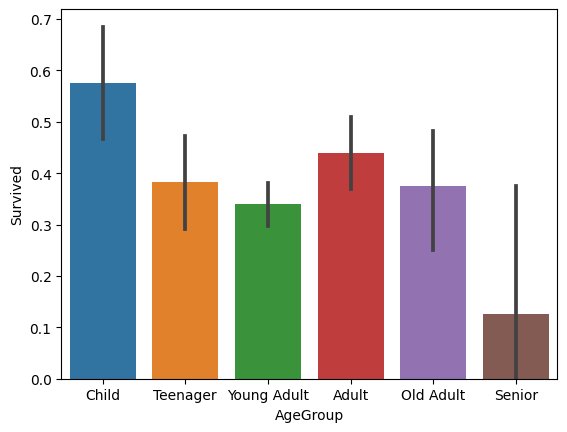

In [41]:
#We're still cleaning data, but I just have to have a pretty graph, so let's look at survivability by age, here I made these bins this size, just cause.  I use "np.inf" for "infinity" but I could have just used "85" since the oldest person is 80.
bins=[0,12,20,35,50,65,np.inf]
#different bins would (obviously!) give different results, but generally "over 50% of children were saved" and "under 40% of everyone else"
#I don't want to mess up the original data, so I'll make a new "NewAge" dataset:
titanicdataNewAge=titanicdata
labels = ['Child', 'Teenager', 'Young Adult', 'Adult', 'Old Adult','Senior']
titanicdataNewAge['AgeGroup']=pd.cut(titanicdata["Age"],bins,labels=labels)
sns.barplot(x="AgeGroup", y="Survived", data=titanicdataNewAge)

<Axes: xlabel='CabinBin', ylabel='Survived'>

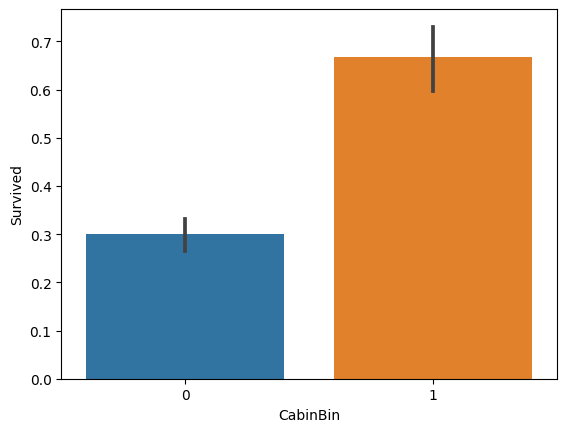

In [42]:
#Let's move on to filling in Cabin details. There are a lot (687) missing values, BUT, the fact that there are cabins listed, actually informs surviability: check out this graphic:
#Creating a new column and representing having a cabin as "1"
titanicdata["CabinBin"]=(titanicdata["Cabin"].notnull().astype('int'))
sns.barplot(x="CabinBin",y="Survived",data=titanicdata)

SO--having a cabin played a HUGE role in survivability.  Though it should be noted that half of the kaggle websites I used dropped the feature as there were too many missing values.  It is better to convert what we know to "1" and what we don't know to "0".  Next we'll drop the "Cabin" column.

In [43]:
#Since we made a new data column, "CabinBin", we'll drop the old one, "Cabin"
titanicdata.drop(['Cabin'],axis=1,inplace=True)

In [44]:
#wooooo--where are we? let's take a look!
titanicdata.sample(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeGroup,CabinBin
544,0,1,male,50.0,1,0,106.4250,C,Mr,Adult,1
788,1,3,male,1.0,1,2,20.5750,S,Master,Child,0
158,0,3,male,32.3,0,0,8.6625,S,Mr,Young Adult,0
278,0,3,male,7.0,4,1,29.1250,Q,Master,Child,0
57,0,3,male,28.5,0,0,7.2292,C,Mr,Young Adult,0
882,0,3,female,22.0,0,0,10.5167,S,Miss,Young Adult,0
98,1,2,female,34.0,0,1,23.0000,S,Mrs,Young Adult,0
43,1,2,female,3.0,1,2,41.5792,C,Miss,Child,0
151,1,1,female,22.0,1,0,66.6000,S,Mrs,Young Adult,1
705,0,2,male,39.0,0,0,26.0000,S,Mr,Adult,0


In [45]:
#Checking for NaN:
titanicdata.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Title       0
AgeGroup    0
CabinBin    0
dtype: int64

# 3.23 Time to use some tools to create (clean-up) the rest of the data!

In [46]:
#Here is an idea many data scientists used.  I wouldn't have thought of this, but those travelling alone were more likely to have not survived.  Families stick together!
#Combining SibSp and Parch to make 'FamilySize' and 'IsAlone' if FamilySize is <2
titanicdata['FamilySize'] = titanicdata ['SibSp'] + titanicdata['Parch'] + 1
#make all values 1
titanicdata['IsAlone'] = 1
#turn 1s to 0s if not alone
titanicdata.loc[titanicdata['FamilySize'] > 1,'IsAlone'] = 0

<Axes: xlabel='FamilySize', ylabel='Survived'>

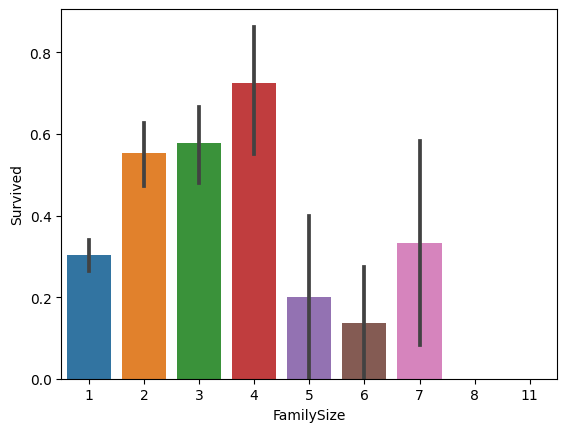

In [47]:
#why did we do that?---familysizes of 2,3,4 had higher chance of surviving, but notsomuch for bigger families or family size 1, i.e. IsAlone
sns.barplot(x='FamilySize',y='Survived',data=titanicdata)

<Axes: xlabel='IsAlone', ylabel='Survived'>

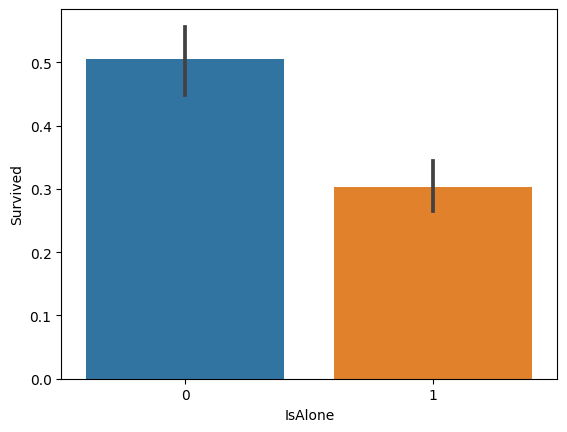

In [48]:
#"0" is Not Alone, "1" is Alone--roughly 30% survived
sns.barplot(x='IsAlone',y='Survived',data=titanicdata)

In [49]:
#I like to check how things are looking...
titanicdata.sample(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeGroup,CabinBin,FamilySize,IsAlone
68,1,3,female,17.0,4,2,7.9250,S,Miss,Teenager,0,7,0
360,0,3,male,40.0,1,4,27.9000,S,Mr,Adult,0,6,0
835,1,1,female,39.0,1,1,83.1583,C,Miss,Adult,1,3,0
860,0,3,male,41.0,2,0,14.1083,S,Mr,Adult,0,3,0
724,1,1,male,27.0,1,0,53.1000,S,Mr,Young Adult,1,2,0
879,1,1,female,56.0,0,1,83.1583,C,Mrs,Old Adult,1,2,0
740,1,1,male,32.3,0,0,30.0000,S,Mr,Young Adult,1,1,1
598,0,3,male,32.3,0,0,7.2250,C,Mr,Young Adult,0,1,1
72,0,2,male,21.0,0,0,73.5000,S,Mr,Young Adult,0,1,1
799,0,3,female,30.0,1,1,24.1500,S,Mrs,Young Adult,0,3,0


In [50]:
#OK--I'm tired of this--let's clean up the rest and get to Exploratory Analysis and model building
#Basically we need to convert female/male to 1/0 and mr/miss/master to 1/2/3 etc.
titanicdata['Sex'] = titanicdata['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

In [51]:
titanicdata['Embarked'] = titanicdata['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

In [52]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
titanicdata['Title'] = titanicdata['Title'].map(title_mapping).astype(int)

In [ ]:
#I killed AgeGroup at midnight last night because it was registering as categorical...BUT I FIXED IT WITH THE ADDITION OF .astype(int)
AgeGroup_mapping = {"Child":1, "Teenager":2, "Young Adult":3, "Adult":4, "Old Adult":5,"Senior":6}
titanicdata['AgeGroup'] = titanicdata['AgeGroup'].map(AgeGroup_mapping).astype(int)

In [56]:
#Now we can also drop the Age column
titanicdata.drop(['Age'],axis=1,inplace=True)

In [59]:
#As we did earlier with age, we will split the Fare into Bins.  Here I'm using qcut so each bin contains roughly the same number of fares.
titanicdata['FareBin'] = pd.qcut(titanicdata['Fare'], 4)
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
#But then I need to adjust the bins into numbers, this command does that!
titanicdata['FareBin_Code'] = label.fit_transform(titanicdata['FareBin'])


In [61]:
#and then drop Fare
titanicdata.drop(['Fare'],axis=1,inplace=True)

In [63]:
#and then drop FareBin---should have used one command, but I already ran the one above, and I can't run it again without an error!
titanicdata.drop(['FareBin'],axis=1,inplace=True)

In [64]:
#One last look at the data--only integers!
titanicdata.info()
print(titanicdata.sample(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Survived      891 non-null    int64
 1   Pclass        891 non-null    int64
 2   Sex           891 non-null    int64
 3   SibSp         891 non-null    int64
 4   Parch         891 non-null    int64
 5   Embarked      891 non-null    int64
 6   Title         891 non-null    int64
 7   AgeGroup      891 non-null    int64
 8   CabinBin      891 non-null    int64
 9   FamilySize    891 non-null    int64
 10  IsAlone       891 non-null    int64
 11  FareBin_Code  891 non-null    int64
dtypes: int64(12)
memory usage: 83.7 KB
     Survived  Pclass  Sex  SibSp  Parch  Embarked  Title  AgeGroup  CabinBin  \
568         0       3    0      0      0         1      1         3         0   
284         0       1    0      0      0         0      1         3         1   
677         1       3    1      0     

In [ ]:
#hopefully can do some more #4 exploratory at some point, but I'm tired so I'm doing models now:

# 5: MACHINE LEARNING MODELS!
Now we are ready to train a model and predict the required solution. There are 60+ predictive modelling algorithms to choose from. We must understand the type of problem and solution requirement to narrow down to a select few models which we can evaluate. Our problem is a classification and regression problem. We want to identify relationship between output (Survived or not) with other variables or features (Gender, Age, Title...). We are also perfoming a category of machine learning which is called supervised learning as we are training our model with a given dataset. With these two criteria - Supervised Learning plus Classification and Regression, we can narrow down our choice of models to a few.

I wanted this picture to just be here, but I couldn't get it to work...so here's a link!
https://ferrisstateuniversity-my.sharepoint.com/:i:/g/personal/troubaj_ferris_edu/EZSEiQEzaKlNhhNZpQuCn6QBX5i7D-6MCtXb7SQTl9waJg?e=LhpbMi

![](https://ferrisstateuniversity-my.sharepoint.com/:i:/g/personal/troubaj_ferris_edu/EZSEiQEzaKlNhhNZpQuCn6QBX5i7D-6MCtXb7SQTl9waJg?e=LhpbMi)

In [66]:
X_train=titanicdata.drop("Survived",axis=1)
Y_train=titanicdata["Survived"]

In [67]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

82.15

In [68]:
#The next model Random Forests is one of the most popular. Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks, that operate by constructing a multitude of decision trees (n_estimators=100) at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees.
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

90.68

Ahm, say what now?!? I guess 10-hours pays off!  
Now, what really is happening is we have overfit our model.  We need to apply our random forest to new data.  Officially, Titanic data is divided into train data (what we've been using) and test data (where we actually need to apply our model).  If I have time, I'll see how this model does on the test data!

#




I'm leaving space for this stuff below.  I just can't delete it, it took me too long to enter.  Basically this stuff below is a VERY QUICK machine learning algorithm that deletes most columns and just lets things happen.

In [ ]:
#These next few commands are a sidebar--in Excel we focused on Pclass and Sex and built a model.  Let's do a quick machine learning model!
#This command drops all the columns that aren't Pclass or Sex, and then gives a sample to see. 
train_df = pd.read_csv('/kaggle/input/titanic/train.csv')
quicktrain_df = train_df.drop(['PassengerId','Name','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked'], axis=1)
quicktrain_df.sample(5)

In [ ]:
#Sex is a categorical variable "male" or "female" we need it to be integer valued for our machine learning model, so we switch to binary designation:
quicktrain_df['Sex']=quicktrain_df['Sex'].map( {'female': 1, 'male': 0} )

In [ ]:
#We want to use Pclass and Sex to determine survivability (like we did in Excel) so we drop the knowledge of "Survived" for our input variable X_train
# and leave "Survived" in for our output variable.  Note, instead of dropping "Survived" we could have just designated using "Pclass" and "Sex" but
# in a bigger model we would want to use many variables and just leave the predictor out.
X_train = quicktrain_df.drop("Survived", axis=1)
Y_train = quicktrain_df["Survived"]

In [ ]:
#This is our machine learning model, RandomForest, we'll talk about the details later
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

The point here is we get 78.68%--exactly the same as using excel to predict all women survived.  
But, we can easily go further...
The next command combines it all into one quick algorithm to get our highest percentage yet!  Essentially we keep SipSp (number of siblings and/or spouse aboard) and Parch (number of parents/children aboard), and let machine learning figure it out!

In [ ]:
quickml_df=train_df.drop(['PassengerId','Name','Age','Ticket','Fare','Cabin','Embarked'], axis=1)
quickml_df['Sex']=quickml_df['Sex'].map( {'female': 1, 'male': 0} )
X_train = quickml_df.drop("Survived", axis=1)
Y_train = quickml_df["Survived"]
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest
